In [1]:
import numpy as np
from wgpu.gui.auto import WgpuCanvas
import pygfx as gfx
from fastplotlib import GridPlot, Scatter

RFBOutputContext()


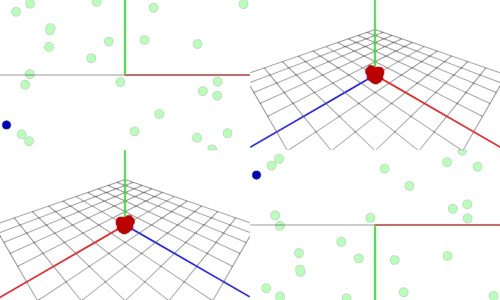

JupyterWgpuCanvas()

In [2]:
canvas = WgpuCanvas()
renderer = gfx.renderers.WgpuRenderer(canvas)

grid_plot = GridPlot(
    canvas=canvas,
    renderer=renderer,
    grid_shape=(2, 2),
    cameras=np.array([['o', 'p'], ['p', 'o']]),
    controllers=np.array([[0, 1,], [1, 0]])
)

# 100 xyz coordinates 
dims = (100, 3)
clouds = list()

offset = 3

normal = np.random.normal(size=dims)
cloud = np.vstack(
    [
        normal - offset,
        normal,
        normal + offset,
    ]
)

# colors with a numerical mapping
colors = np.array(([0] * 100) + ([1] * 100) + ([2] * 100))

for subplot in grid_plot:
    scatter = Scatter(data=cloud, colors=colors, cmap='jet')
    subplot.add_graphic(scatter)
    
    subplot.set_axes_visibility(True)
    subplot.set_grid_visibility(True)
    
grid_plot.subplots[1, 0].camera.scale.x = -1
grid_plot.subplots[1, 1].camera.scale.y = -1
    
canvas.request_draw(grid_plot.animate)
canvas